In [105]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [175]:
pwd

'C:\\Users\\18644\\Desktop\\THINKFUL\\Data Science Bootcamp\\UNIT 2\\Capstone'

In [176]:
df = pd.read_csv('googleplaystore.csv', encoding = 'latin1')

In [177]:
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


Data Cleaning 

In [178]:
print(df.shape)

(10841, 13)


In [179]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Rating,1474,0.135965
Current Ver,8,0.000738
Android Ver,3,0.000277
Content Rating,1,0.000092
Type,1,0.000092
Last Updated,0,0.000000


In [180]:
df.dropna(how = 'any', inplace = True)

In [181]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Android Ver,0,0.0
Current Ver,0,0.0
Last Updated,0,0.0
Genres,0,0.0
Content Rating,0,0.0
Price,0,0.0


In [182]:
df.shape


(9360, 13)

For Installs

In [183]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '100+', '500+', '10+',
       '5+', '50+', '1+'], dtype=object)

In [184]:
df.Installs = df.Installs.apply(lambda x: x.replace(',',''))
df.Installs = df.Installs.apply(lambda x: x.replace('+',''))
df.Installs = df.Installs.apply(lambda x: int(x))

For Size

In [185]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '5.5M', '17M', '39M', '31M',
       '4.2M', '23M', '6.0M', '6.1M', '4.6M', '9.2M', '5.2M', '11M',
       '24M', 'Varies with device', '9.4M', '15M', '10M', '1.2M', '26M',
       '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k', '3.6M', '5.7M',
       '8.6M', '2.4M', '27M', '2.7M', '2.5M', '7.0M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '22M', '6.4M', '3.2M', '8.2M', '4.9M', '9.5M', '5.0M',
       '5.9M', '13M', '73M', '6.8M', '3.5M', '4.0M', '2.3M', '2.1M',
       '42M', '9.1M', '55M', '23k', '7.3M', '6.5M', '1.5M', '7.5M', '51M',
       '41M', '48M', '8.5M', '46M', '8.3M', '4.3M', '4.7M', '3.3M', '40M',
       '7.8M', '8.8M', '6.6M', '5.1M', '61M', '66M', '79k', '8.4M',
       '3.7M', '118k', '44M', '695k', '1.6M', '6.2M', '53M', '1.4M',
      

For Size

In [186]:
df['Size'].replace('Varies with device', np.nan, inplace = True ) 
df['Size']=df['Size'].str.extract(r'([\d\.]+)', expand=False).astype(float) * \
df['Size'].str.extract(r'([kM]+)', expand=False).fillna(1).replace(['k','M'],[1,1000]).astype(int)

In [187]:
df['Size'] = df['Size'].fillna((df['Size'].mean()))

In [188]:
df['Size'].unique()

array([1.90000000e+04, 1.40000000e+04, 8.70000000e+03, 2.50000000e+04,
       2.80000000e+03, 5.60000000e+03, 2.90000000e+04, 3.30000000e+04,
       3.10000000e+03, 2.80000000e+04, 1.20000000e+04, 2.00000000e+04,
       2.10000000e+04, 3.70000000e+04, 5.50000000e+03, 1.70000000e+04,
       3.90000000e+04, 3.10000000e+04, 4.20000000e+03, 2.30000000e+04,
       6.00000000e+03, 6.10000000e+03, 4.60000000e+03, 9.20000000e+03,
       5.20000000e+03, 1.10000000e+04, 2.40000000e+04, 2.29704561e+04,
       9.40000000e+03, 1.50000000e+04, 1.00000000e+04, 1.20000000e+03,
       2.60000000e+04, 8.00000000e+03, 7.90000000e+03, 5.60000000e+04,
       5.70000000e+04, 3.50000000e+04, 5.40000000e+04, 2.01000000e+02,
       3.60000000e+03, 5.70000000e+03, 8.60000000e+03, 2.40000000e+03,
       2.70000000e+04, 2.70000000e+03, 2.50000000e+03, 7.00000000e+03,
       1.60000000e+04, 3.40000000e+03, 8.90000000e+03, 3.90000000e+03,
       2.90000000e+03, 3.80000000e+04, 3.20000000e+04, 5.40000000e+03,
      

In [189]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

For Price

In [190]:
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$7.99 ', '$5.99 ', '$2.99 ',
       '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ', '$9.00 ',
       '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ', '$16.99 ',
       '$14.99 ', '$29.99 ', '$12.99 ', '$2.49 ', '$10.99 ', '$1.50 ',
       '$19.99 ', '$15.99 ', '$33.99 ', '$39.99 ', '$3.95 ', '$4.49 ',
       '$1.70 ', '$8.99 ', '$1.49 ', '$3.88 ', '$399.99 ', '$17.99 ',
       '$400.00 ', '$3.02 ', '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ',
       '$2.50 ', '$1.59 ', '$6.49 ', '$1.29 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$8.49 ', '$1.75 ', '$14.00 ',
       '$2.00 ', '$3.08 ', '$2.59 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$13.99 ', '$4.29 ', '$3.28 ', '$4.60 ',
       '$1.00 ', '$2.95 ', '$2.90 ', '$1.97 ', '$2.56 ', '$1.20 '],
      dtype=object)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null object
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null object
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 1023.8+ KB


For Price

In [192]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))  

For Reviews

In [193]:
df['Review']= df['Reviews'].apply(lambda x: int(x))

In [194]:
df['Category']= df['Category'].apply(lambda x: str(x))

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 14 columns):
App               9360 non-null object
Category          9360 non-null object
Rating            9360 non-null float64
Reviews           9360 non-null int64
Size              9360 non-null float64
Installs          9360 non-null int64
Type              9360 non-null object
Price             9360 non-null float64
Content Rating    9360 non-null object
Genres            9360 non-null object
Last Updated      9360 non-null object
Current Ver       9360 non-null object
Android Ver       9360 non-null object
Review            9360 non-null int64
dtypes: float64(3), int64(3), object(8)
memory usage: 1.1+ MB


In [196]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,967
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,967


In [197]:
df.dropna(how = 'any')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.000000,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,967
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.000000,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.000000,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.000000,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,967
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.000000,50000,Free,0.0,Everyone,Art & Design,26-Mar-17,1,2.3 and up,167
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.000000,50000,Free,0.0,Everyone,Art & Design,26-Apr-18,1.1,4.0.3 and up,178
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.000000,1000000,Free,0.0,Everyone,Art & Design,14-Jun-18,6.1.61.1,4.2 and up,36815
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.000000,1000000,Free,0.0,Everyone,Art & Design,20-Sep-17,2.9.2,3.0 and up,13791
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.000000,10000,Free,0.0,Everyone,Art & Design;Creativity,3-Jul-18,2.8,4.0.3 and up,121


In [198]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Review
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,967
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,967


Data exploration using univariate and bivariate methods

Relationship between continuous variables

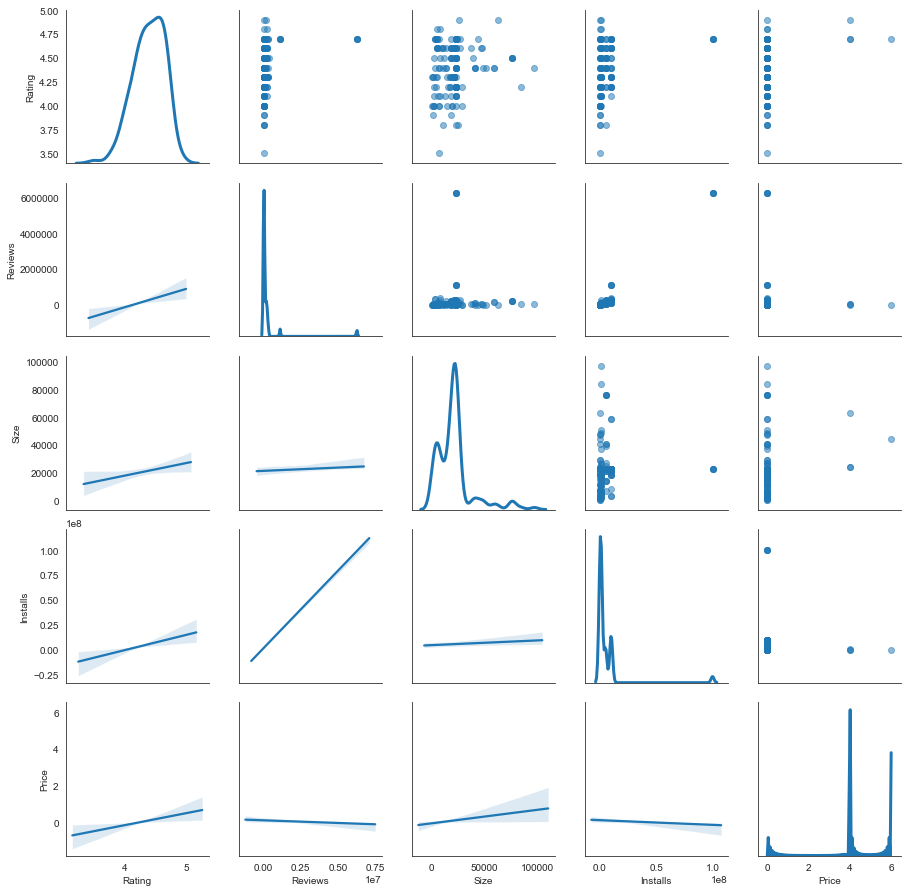

In [199]:
sns.set_style("white")

df_cat_3 =  df.loc[
    ((df['Category'] == 'EDUCATION')),
    ['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Price']
]
df_cat_scatter = df_cat_3.loc[:, 'Rating':'Price']
g = sns.PairGrid(df_cat_scatter, diag_sharey=False)
g.map_upper(plt.scatter, alpha=.5)
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
g.map_diag(sns.kdeplot, lw=3)
plt.show()



Text(0.5, 1.0, 'Count of application according to category')

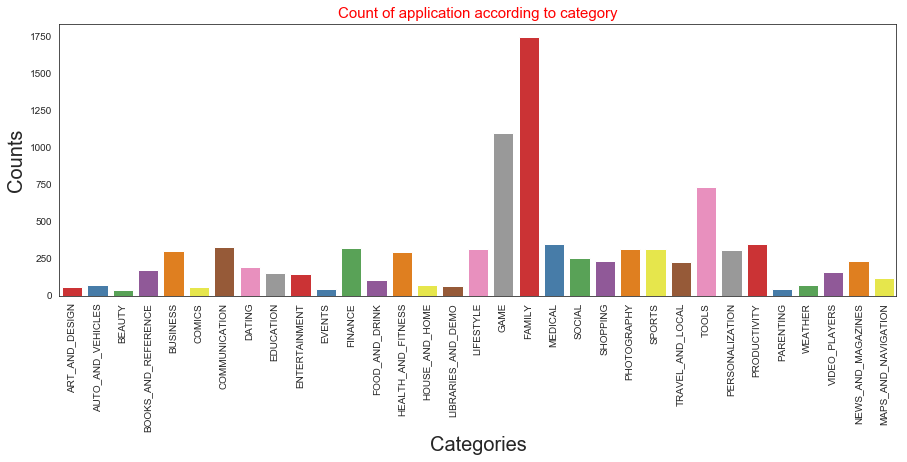

In [200]:
plt.figure(figsize=(15, 5)) 
sns.countplot(x='Category', data=df, palette='Set1') 
plt.xticks(rotation=90) 
plt.xlabel('Categories', fontsize=20) 
plt.ylabel('Counts', fontsize=20) 
plt.title('Count of application according to category', fontsize=15, color='r')

Text(0.5, 1.0, 'Count of application according to genres')

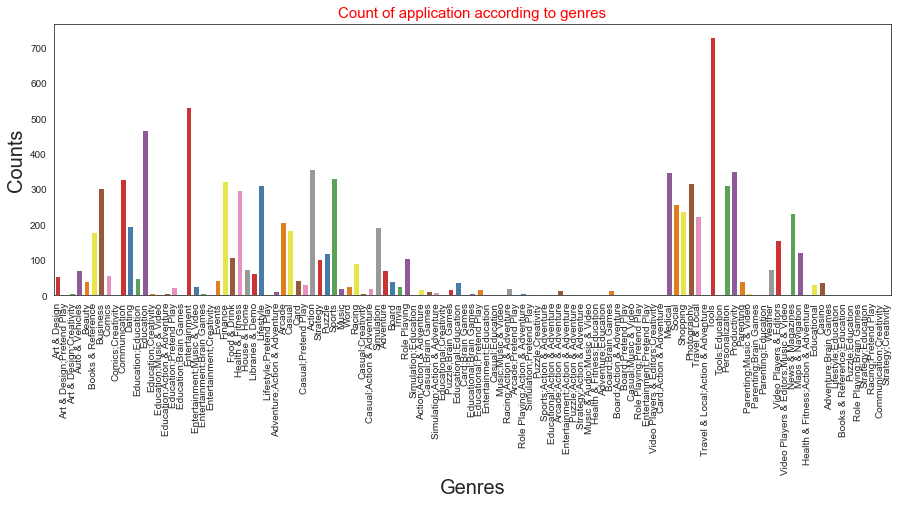

In [201]:
plt.figure(figsize=(15, 5)) 
sns.countplot(x='Genres', data=df, palette='Set1') 
plt.xticks(rotation=90) 
plt.xlabel('Genres', fontsize=20) 
plt.ylabel('Counts', fontsize=20) 
plt.title('Count of application according to genres', fontsize=15, color='r')

Text(0.5, 1.0, 'Distribution of Rating')

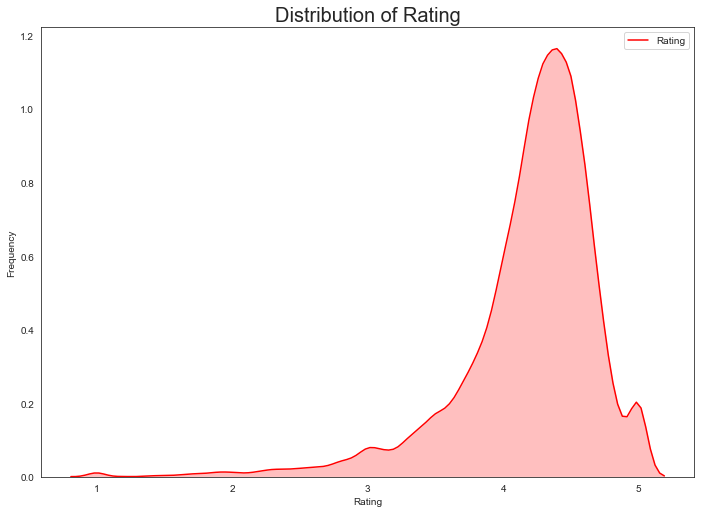

In [202]:
from pylab import rcParams 
rcParams['figure.figsize'] = 11.7,8.27 
g = sns.kdeplot(df.Rating, color="Red", shade = True) 
g.set_xlabel("Rating")
g.set_ylabel("Frequency") 
plt.title('Distribution of Rating',size = 20)

In [203]:
from wordcloud import WordCloud 
wordcloud1 = WordCloud(max_font_size=350, collocations=False, max_words=33, width=1600, height=800, 
                       background_color="white").generate(' '.join(df['Category']))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud1, interpolation="bilinear") 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

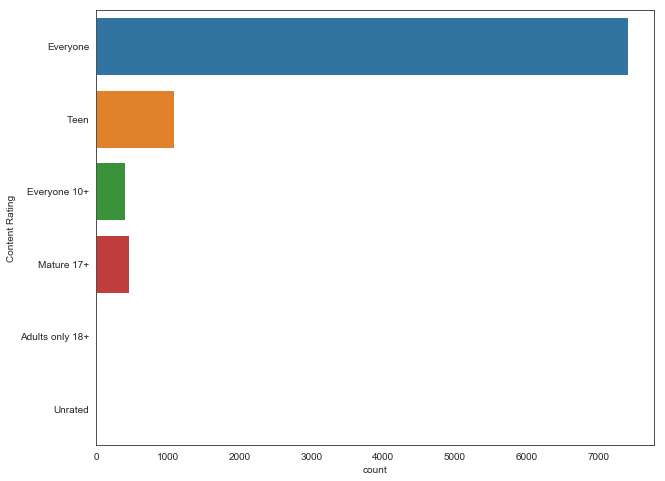

In [211]:
plt.figure(figsize=(10,8)) 
ax = sns.countplot(y='Content Rating', data=df)

In [212]:
from sklearn import preprocessing 
LE = preprocessing.LabelEncoder() 
df['App'] = LE.fit_transform(df['App'])

In [213]:
# Category features encoding 
CategoryList = df['Category'].unique().tolist()  
CategoryList = ['cat_' + word for word in CategoryList] 
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [214]:
from sklearn import preprocessing 
LE = preprocessing.LabelEncoder() 
df['Type'] = LE.fit_transform(df['Type'])

In [219]:
LE = preprocessing.LabelEncoder() 
df['Genres'] = LE.fit_transform(df['Genres'])

In [220]:
# Genres features encoding
GenresList = df['Genres'].unique().tolist()  
GenresList = ['gen_' + word for word in GenresList] 
df = pd.concat([df, pd.get_dummies(df['Genres'], prefix='gen')], axis=1)

TypeError: can only concatenate str (not "int") to str

In [217]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,cat_PERSONALIZATION,cat_PHOTOGRAPHY,cat_PRODUCTIVITY,cat_SHOPPING,cat_SOCIAL,cat_SPORTS,cat_TOOLS,cat_TRAVEL_AND_LOCAL,cat_VIDEO_PLAYERS,cat_WEATHER
0,5805,ART_AND_DESIGN,4.1,159,19000.0,10000,0,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
1,2134,ART_AND_DESIGN,3.9,967,14000.0,500000,0,0.0,Everyone,11,...,0,0,0,0,0,0,0,0,0,0
2,7321,ART_AND_DESIGN,4.7,87510,8700.0,5000000,0,0.0,Everyone,9,...,0,0,0,0,0,0,0,0,0,0
3,6572,ART_AND_DESIGN,4.5,215644,25000.0,50000000,0,0.0,Teen,9,...,0,0,0,0,0,0,0,0,0,0
4,5860,ART_AND_DESIGN,4.3,967,2800.0,100000,0,0.0,Everyone,10,...,0,0,0,0,0,0,0,0,0,0


In [147]:
df.App.head(5)

0    5805
1    2134
2    7321
3    6572
4    5860
Name: App, dtype: int32

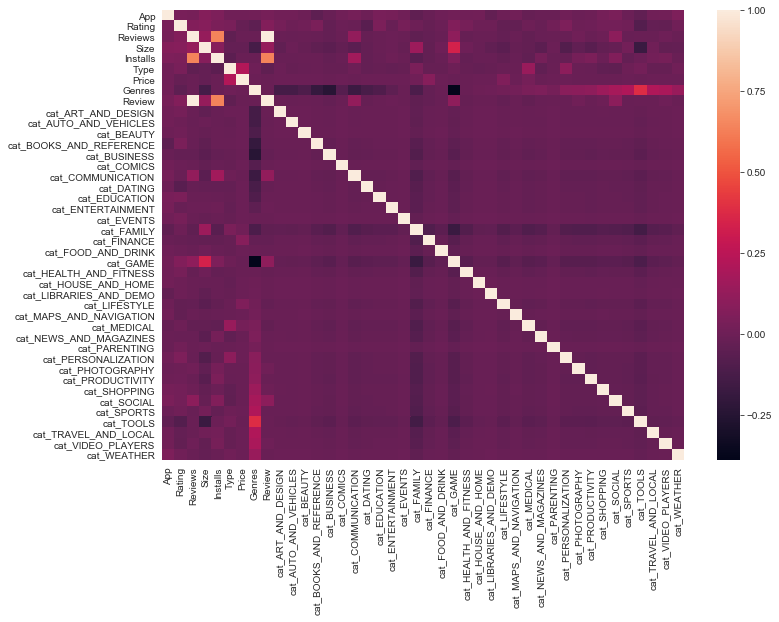

In [148]:
sns.heatmap(df.corr())

In [221]:
df.corr().loc[:, 'Rating'].sort_values(ascending=False).head(20)


Rating                     1.000000
Size                       0.080305
Reviews                    0.068133
Review                     0.068133
cat_GAME                   0.066820
gen_Personalization        0.051689
cat_PERSONALIZATION        0.051689
Installs                   0.051337
cat_EDUCATION              0.049664
gen_Education              0.049303
gen_Puzzle                 0.044567
gen_Books & Reference      0.041678
cat_BOOKS_AND_REFERENCE    0.041678
Type                       0.039592
App                        0.036796
gen_Action                 0.036242
cat_EVENTS                 0.032877
gen_Events                 0.032877
gen_Arcade                 0.032839
cat_HEALTH_AND_FITNESS     0.029958
Name: Rating, dtype: float64

In [222]:
df.corr().loc[:, 'Rating'].sort_values().head(10)

gen_Tools           -0.082114
cat_TOOLS           -0.081825
cat_DATING          -0.062585
gen_Dating          -0.062585
gen_Entertainment   -0.048811
Genres              -0.046871
gen_Educational     -0.036373
cat_LIFESTYLE       -0.035051
gen_Lifestyle       -0.034884
cat_VIDEO_PLAYERS   -0.032784
Name: Rating, dtype: float64

Adding the features that seems to have positive correlation;

In [223]:
features = ['cat_GAME','cat_PERSONALIZATION', 'cat_EDUCATION', 'gen_Personalization' ,'gen_Education', 'gen_Puzzle', 'App', 'Reviews', 'Size', 'Installs', 'Type']
X = df[features]
y = df['Rating']


In [224]:
X.head()

,cat_GAME,cat_PERSONALIZATION,cat_EDUCATION,gen_Personalization,gen_Education,gen_Puzzle,App,Reviews,Size,Installs,Type
0,0,0,0,0,0,0,5805,159,19000.0,10000,0
1,0,0,0,0,0,0,2134,967,14000.0,500000,0
2,0,0,0,0,0,0,7321,87510,8700.0,5000000,0
3,0,0,0,0,0,0,6572,215644,25000.0,50000000,0
4,0,0,0,0,0,0,5860,967,2800.0,100000,0


In [225]:
y.head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64